# World Wonders Identifier Grouped

## Jorge Alberto Padilla Gutierrez

# Imports

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from skimage.color import rgb2gray
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import joblib
from collections import Counter

# Data import

Samples:  5519
Keys:  ['description', 'label', 'filename', 'data']
Description:  resized (32x32)world wonder images in rgb
Labels: ['Alhambra' 'Amundsen-Scott Research Station' 'Angkor Wat' 'Apadana'
 'Big Ben' 'Biosphere de Montreal' 'Bolshoi Theatre' 'Broadway'
 'Casa de Contratacion' 'Chichen Itza' 'Christ the Redeemer' 'Colosseum'
 'Colossus of Rhodes' 'Eiffel Tower' 'El Angel de la Independencia'
 'El Palacio de las Bellas Artes' 'Estadio do Maracana' 'Etemenaki'
 'Forbidden City' 'Golden Gate Bridge' 'Great Library of Alexandria'
 'Great Pyramid of Giza' 'Great Wall of China' 'Great Zimbabwe'
 'Greath Bath' 'Hagia Sophia' 'Hanging Gardens of Babylon' 'Hermitage'
 'Huey Teocalli' 'Jebel Barkal' 'Kilwa Kisiwani' 'Kotokou-in'
 'Leaning Tower of Pisa' 'Lighthouse of Alexandria' 'Machu Picchu'
 'Mahabodhi Temple' 'Mausoleum at Halicarnassus' 'Meenakshi Temple'
 'Mont St. Michel' 'Oracle of Delphi' 'Orszaghaz' 'Oxford University'
 'Panama Canal' 'Petra' 'Potala Palace' 'Ruhr Valley'
 '

C:\Users\japadill\AppData\Local\Temp\ipykernel_2452\3684873375.py:14: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  fig.tight_layout()


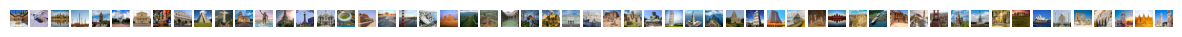

In [18]:
SIZE = 32

data = joblib.load(fr'{os.path.abspath(os.getcwd())}/../data/processed/World_Wonders_{SIZE}x{SIZE}.pkl')
print('Samples: ', len(data['data']))
print('Keys: ', list(data.keys()))
print('Description: ', data['description'])
print('Labels:', np.unique(data['label']))
print(Counter(data['label']))
# Print them with plt
labels = np.unique(data['label'])

fig, axes = plt.subplots(1, len(labels))
fig.set_size_inches(15,4)
fig.tight_layout()

# Print only one for each label
for ax, label in zip(axes, labels):
    idx = data['label'].index(label)
    
    ax.imshow(data['data'][idx])
    ax.axis('off')
    # ax.set_title(label)

Text(0.5, 1.0, 'El Angel de la Independencia')

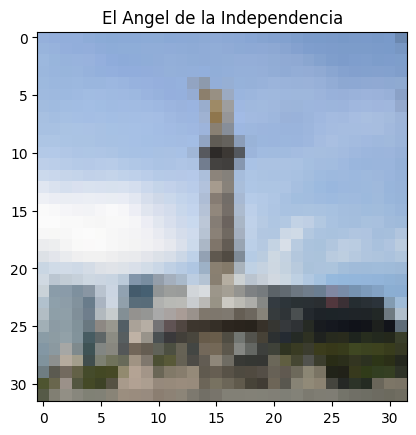

In [19]:
plt.imshow(data['data'][1340])
plt.title(data['label'][1340])

# Feature Engineering

In [20]:
X = np.array(data['data'], dtype=int)
print(X)
print(X.shape)

[[[[ 34  98 199]
   [ 34  97 200]
   [ 33  96 199]
   ...
   [ 81 106  68]
   [103  92  96]
   [ 70  36  21]]

  [[ 39 106 207]
   [ 37 102 203]
   [ 35  99 202]
   ...
   [ 98  85  54]
   [ 60  29  17]
   [146  92  61]]

  [[ 56 122 215]
   [ 43 110 210]
   [ 37 103 204]
   ...
   [ 70  36  24]
   [144  87  58]
   [166 107  73]]

  ...

  [[197 210 217]
   [177 187 193]
   [209 216 227]
   ...
   [202 216 226]
   [206 222 231]
   [187 204 216]]

  [[214 228 237]
   [209 224 234]
   [217 225 235]
   ...
   [206 220 232]
   [201 217 228]
   [203 220 231]]

  [[210 226 236]
   [218 231 240]
   [221 229 238]
   ...
   [207 222 234]
   [206 223 235]
   [183 204 223]]]


 [[[168 199 243]
   [167 199 243]
   [166 198 242]
   ...
   [181 205 245]
   [183 205 244]
   [184 205 244]]

  [[173 202 244]
   [171 201 244]
   [169 200 244]
   ...
   [185 208 246]
   [188 210 248]
   [190 211 249]]

  [[177 205 245]
   [176 205 245]
   [175 203 244]
   ...
   [153 146 151]
   [151 147 156]
   [171 177

In [21]:
## Moved to after test train split
# minmax = MinMaxScaler()
# X = minmax.fit_transform((X).reshape(-1,1))
# X = X.reshape(-1,SIZE,SIZE,3)
# print(X)
# print(X.shape)

Text(0.5, 1.0, 'El Angel de la Independencia')

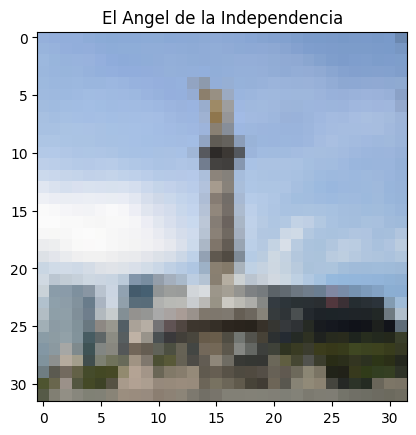

In [22]:
plt.imshow(X[1340])
plt.title(data['label'][1340])

In [23]:
X_bw = rgb2gray(data['data'])
print(X_bw.shape)

(5519, 32, 32)


Text(0.5, 1.0, 'El Angel de la Independencia')

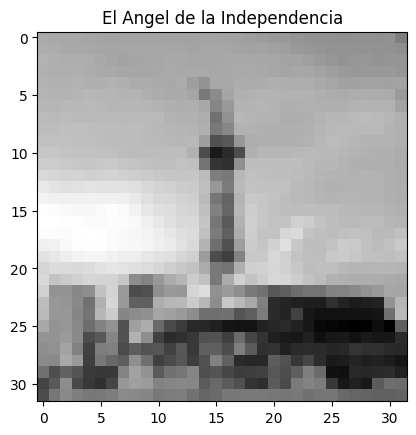

In [24]:
plt.imshow(X_bw[1340], cmap='gray')
plt.title(data['label'][1340])

In [25]:
# Need to do 1 dimention for X
X = np.reshape(X, (len(X), -1, ))
print(X)
print(X.shape)

X_bw = np.reshape(X_bw, (len(X), -1, ))
print(X_bw)
print(X_bw.shape)

[[ 34  98 199 ... 183 204 223]
 [168 199 243 ...  62  69  52]
 [ 44  47  29 ...  26  38   2]
 ...
 [ 71 116 201 ...  14 120 176]
 [ 52 116 176 ...  22 122 175]
 [164 214 240 ...  14 118 173]]
(5519, 3072)
[[0.35953765 0.3570149  0.35309333 ... 0.86148118 0.86373608 0.78787216]
 [0.76699961 0.76616627 0.76224471 ... 0.22827176 0.2246549  0.25994824]
 [0.17672431 0.30564588 0.27924471 ... 0.14087333 0.13331294 0.12884078]
 ...
 [0.44143529 0.45822275 0.48228784 ... 0.4523349  0.44869608 0.39808863]
 [0.41853333 0.4106902  0.41599569 ... 0.42294941 0.42853765 0.41008353]
 [0.80490039 0.79876157 0.7875851  ... 0.46239529 0.4570898  0.39162941]]
(5519, 1024)


### Group by Era

In [26]:
# Ancient
data = pd.DataFrame(data).replace(['Etemenaki', 'Greath Bath', 'Hanging Gardens of Babylon', 'Oracle of Delphi', 'Great Pyramid of Giza', 'Stonehenge', 'Temple of Artemis at Ephesus'],'Antiquity')
# Classical
data = data.replace(['Apadana', 'Colosseum', 'Colossus of Rhodes', 'Great Library of Alexandria', 'Lighthouse of Alexandria', 'Jebel Barkal', 'Machu Picchu', 'Mahabodhi Temple', 'Mausoleum at Halicarnassus', 'Petra', 'Statue of Zeus at Olympia', 'Terracota Army', 'Great Wall of China'],'Antiquity')
# Medieval
data = data.replace(['Alhambra', 'Angkor Wat', 'Chichen Itza', 'Hagia Sophia', 'Huey Teocalli', 'Kilwa Kisiwani', 'Kotokou-in', 'Meenakshi Temple', 'Mont St. Michel', 'Leaning Tower of Pisa', 'University of Sankore'],'Exploration')
# Renaissance
data = data.replace(['Casa de Contratacion', 'Forbidden City', 'Great Zimbabwe', 'Potala Palace', 'St. Basils Cathedral', 'Taj Mahal', 'Torre de Belem', 'Venetian Arsenal'],'Exploration')
# Industrial
data = data.replace(['Big Ben', 'Bolshoi Theatre', 'Hermitage', 'Orszaghaz', 'Oxford University', 'Panama Canal', 'Ruhr Valley', 'Statue of Liberty', 'El Angel de la Independencia'],'Modern')
# Modern
data = data.replace(['El Palacio de las Bellas Artes', 'Broadway', 'Christ the Redeemer', 'Eiffel Tower', 'Golden Gate Bridge'],'Modern')
# Atomic
data = data.replace(['Amundsen-Scott Research Station', 'Biosphere de Montreal', 'Estadio do Maracana', 'Sydney Opera House'],'Modern')

In [27]:
le = preprocessing.LabelEncoder()
le.fit(data['label'])
y = np.array(le.transform(data['label']))
print(y)
print(y.shape)

[1 1 1 ... 1 1 1]
(5519,)


# PCA

In [28]:
pca = PCA(n_components=256)
X_pca = pca.fit_transform(X)
print(X_pca.shape)
X_bw_pca = pca.fit_transform(X_bw)
print(X_bw_pca.shape)

(5519, 256)
(5519, 256)


# Algorithm

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=42, stratify=y)
X_bw_train, X_bw_test, y_bw_train, y_bw_test = train_test_split(X_bw, y, test_size=0.1, shuffle=True, random_state=42, stratify=y)
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, y, test_size=0.1, shuffle=True, random_state=42, stratify=y)
X_bw_pca_train, X_bw_pca_test, y_bw_pca_train, y_bw_pca_test = train_test_split(X_bw_pca, y, test_size=0.1, shuffle=True, random_state=42, stratify=y)

In [ ]:
pipe = Pipeline([
    ('standar',StandardScaler()),
    ('normalizer',Normalizer(norm='l2'))
])

pipe_pca = Pipeline([
    ('standar',StandardScaler()),
    ('normalizer',Normalizer(norm='l2')),
    ('pca',PCA(n_components=256))
])

pipe64_pca = Pipeline([
    ('standar',StandardScaler()),
    ('normalizer',Normalizer(norm='l2')),
    ('pca',PCA(n_components=64))
])

# X_train = pipe.fit_transform(X_train)
# X_test = pipe.transform(X_test)
# 
# X_pca_train = pipe_pca.fit_transform(X_train)
# X_pca_test = pipe_pca.transform(X_test)
# 
# X_pca64_train = pipe_pca.fit_transform(X_train)
# X_pca64_test = pipe_pca.transform(X_test)

# X = minmax.fit_transform((X).reshape(-1,1))
# X = X.reshape(-1,SIZE,SIZE,3)
print(X_train)
print(X_train.shape)
print(X_test)
print(X_test.shape)

print(X_pca_train)
print(X_pca_train.shape)
print(X_pca_test)
print(X_pca_test.shape)

[[-0.01622341 -0.01207348  0.00323731 ...  0.02683228  0.0198804
   0.01650191]
 [-0.02044381 -0.02435035 -0.01856104 ... -0.01629568 -0.01461085
  -0.0097732 ]
 [ 0.01153101  0.00955487  0.00250545 ...  0.01724029 -0.01136498
  -0.00402908]
 ...
 [ 0.00738718  0.00670009  0.00135034 ...  0.00967443  0.00855288
   0.00672666]
 [ 0.04110024  0.03870521  0.02904715 ...  0.00517817  0.00751376
   0.00762347]
 [ 0.00789711  0.01506575  0.0171076  ...  0.02892109  0.02663755
   0.02510219]]
(4967, 3072)
[[ 0.01933063  0.00047612 -0.00114404 ... -0.01689069 -0.02096151
  -0.01451672]
 [-0.00718406 -0.00168715  0.0098371  ... -0.0168497  -0.01770343
  -0.01329441]
 [ 0.01932815  0.0177733   0.01356854 ...  0.02331397  0.02543127
   0.02605169]
 ...
 [-0.02392928 -0.01316686 -0.00415276 ...  0.02544496  0.01677612
  -0.00230734]
 [-0.01966492 -0.02101693 -0.01469338 ...  0.01241432  0.00226709
  -0.00735628]
 [-0.01107056 -0.00817341 -0.00115632 ... -0.00748064  0.00078125
  -0.004875  ]]
(552

In [31]:
smote = SMOTE(k_neighbors=5, random_state=42)
smote_pca = SMOTE(k_neighbors=5, random_state=42)

X_train_resample, y_train_resample = smote.fit_resample(X_train, y_train)
X_train_pca_resample, y_train_pca_resample = smote_pca.fit_resample(X_pca_train, y_pca_train)

labels, counts = np.unique(y_train_resample, return_counts=True)
for label, count in zip(labels, counts):
    print(f"Class: {label} Instances: {count}")

Class: 0 Instances: 1750
Class: 1 Instances: 1750
Class: 2 Instances: 1750


# Current Best
## RandomForest with PCA 64

In [90]:
pipe_best_pca = Pipeline([
    ('standar',StandardScaler()),
    ('normalizer',Normalizer(norm='l2')),
    ('pca',PCA(n_components=64, random_state=42))
])

X_pca_best_train = pipe_best_pca.fit_transform(X_train_resample)
X_pca_best_test = pipe_best_pca.transform(X_test)

model_pca_best_rf_tuned = RandomForestClassifier(n_estimators=1000, criterion='gini', max_depth=32, min_samples_split=2, min_samples_leaf=2, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, n_jobs=-1, random_state=42)
model_pca_best_rf_tuned.fit(X_pca_best_train, y_train_resample)
tpred_pca_best_rf_tuned = model_pca_best_rf_tuned.predict(X_pca_best_train)
pred_pca_best_rf_tuned = model_pca_best_rf_tuned.predict(X_pca_best_test)
print(accuracy_score(y_train_resample, tpred_pca_best_rf_tuned))
print(accuracy_score(y_test, pred_pca_best_rf_tuned))

1.0
0.6431159420289855


# Current 2nd Best
## SVC with No PCA

In [88]:
pipe_best_pca = Pipeline([
    ('standar',StandardScaler()),
    ('normalizer',Normalizer(norm='l2')),
    ('pca',PCA(n_components=3072, random_state=42))
])

X_pca_best_train = pipe_best_pca.fit_transform(X_train_resample)
X_pca_best_test = pipe_best_pca.transform(X_test)

model_pca_best_svc_tuned = SVC(C=100.0, kernel='rbf', degree=3, gamma='scale', tol=0.05, max_iter=-1, class_weight='balanced', random_state=42)
model_pca_best_svc_tuned.fit(X_pca_best_train, y_train_resample)
tpred_pca_best_svc_tuned = model_pca_best_svc_tuned.predict(X_pca_best_train)
pred_pca_best_svc_tuned = model_pca_best_svc_tuned.predict(X_pca_best_test)
print(accuracy_score(y_train_resample, tpred_pca_best_svc_tuned))
print(accuracy_score(y_test, pred_pca_best_svc_tuned))

1.0
0.6268115942028986


In [33]:
pipe_best_pca = Pipeline([
    ('standar',StandardScaler()),
    ('normalizer',Normalizer(norm='l2')),
    ('pca',PCA(n_components=256, random_state=42))
])

X_pca_best_train = pipe_best_pca.fit_transform(X_train_resample)
X_pca_best_test = pipe_best_pca.transform(X_test)

model_pca_best_svc_tuned = SVC(C=22.0, kernel='rbf', degree=3, gamma='scale', tol=0.05, max_iter=-1, class_weight='balanced', random_state=42)
model_pca_best_svc_tuned.fit(X_pca_best_train, y_train_resample)
tpred_pca_best_svc_tuned = model_pca_best_svc_tuned.predict(X_pca_best_train)
pred_pca_best_svc_tuned = model_pca_best_svc_tuned.predict(X_pca_best_test)
print(accuracy_score(y_train_resample, tpred_pca_best_svc_tuned))
print(accuracy_score(y_test, pred_pca_best_svc_tuned))

0.9980952380952381
0.6141304347826086


In [ ]:
pipe_best_pca = Pipeline([
    ('standar',StandardScaler()),
    ('normalizer',Normalizer(norm='l2')),
    ('pca',PCA(n_components=64, random_state=42))
])

X_pca_best_train = pipe_best_pca.fit_transform(X_train_resample)
X_pca_best_test = pipe_best_pca.transform(X_test)

model_pca_best_svc_tuned = SVC(C=100.0, kernel='rbf', degree=3, gamma='scale', tol=0.05, max_iter=-1, class_weight='balanced', random_state=42)
model_pca_best_svc_tuned.fit(X_pca_best_train, y_train_resample)
tpred_pca_best_svc_tuned = model_pca_best_svc_tuned.predict(X_pca_best_train)
pred_pca_best_svc_tuned = model_pca_best_svc_tuned.predict(X_pca_best_test)
print(accuracy_score(y_train_resample, tpred_pca_best_svc_tuned))
print(accuracy_score(y_test, pred_pca_best_svc_tuned))

0.9984761904761905
0.6231884057971014


## Pipelines

In [43]:
pipe_no_pca = Pipeline([
    ('standar',StandardScaler()),
    ('normalizer',Normalizer(norm='l2')),
    ('pca',PCA(n_components=3072, random_state=42))
])

X_no_pca_train = pipe_no_pca.fit_transform(X_train_resample)
X_no_pca_test = pipe_no_pca.transform(X_test)

In [ ]:
pipe_pca256 = Pipeline([
    ('standar',StandardScaler()),
    ('normalizer',Normalizer(norm='l2')),
    ('pca',PCA(n_components=256, random_state=42))
])

X_pca256_train = pipe_pca256.fit_transform(X_train_resample)
X_pca256_test = pipe_pca256.transform(X_test)

In [45]:
pipe_pca64 = Pipeline([
    ('standar',StandardScaler()),
    ('normalizer',Normalizer(norm='l2')),
    ('pca',PCA(n_components=64, random_state=42))
])

X_pca64_train = pipe_pca64.fit_transform(X_train_resample)
X_pca64_test = pipe_pca64.transform(X_test)

## KNeighborsClassifier

### GridSearchCV

In [ ]:
parameters = {
    'n_neighbors':[31,37,41,43,47,53,59,61,67,71,73,79]
}

model = KNeighborsClassifier()
grid = GridSearchCV(model, parameters, n_jobs=-1)
grid.fit(X_train, y_train)

In [44]:
model_knn = KNeighborsClassifier(n_neighbors=7, n_jobs=-1)
model_knn.fit(X_no_pca_train, y_train_resample)
tpred_knn = model_knn.predict(X_no_pca_train)
pred_knn = model_knn.predict(X_no_pca_test)
print(accuracy_score(y_train_resample, tpred_knn))
print(accuracy_score(y_test, pred_knn))

0.6739047619047619
0.519927536231884


In [46]:
model_knn = KNeighborsClassifier(n_neighbors=7, n_jobs=-1)
model_knn.fit(X_pca64_train, y_train_resample)
tpred_knn = model_knn.predict(X_pca64_train)
pred_knn = model_knn.predict(X_pca64_test)
print(accuracy_score(y_train_resample, tpred_knn))
print(accuracy_score(y_test, pred_knn))

0.691047619047619
0.5434782608695652


In [41]:
model_knn = KNeighborsClassifier(n_neighbors=7, n_jobs=-1)
model_knn.fit(X_pca256_train, y_train_resample)
tpred_knn = model_knn.predict(X_pca256_train)
pred_knn = model_knn.predict(X_pca256_test)
print(accuracy_score(y_train_resample, tpred_knn))
print(accuracy_score(y_test, pred_knn))

0.6866666666666666
0.552536231884058


## LogisticRegression

### GridSearchCV

In [70]:
parameters_log = {
    #'penalty':[None, 'l2'],
    'max_iter':[500, 600, 700, 800, 900]
    #'solver':['lbfgs', 'sag', 'saga']
}

model_log = LogisticRegression()
grid_log = GridSearchCV(model_log, parameters_log, n_jobs=-1)
grid_log.fit(X_train, y_train)

c:\Users\japadill\AppData\Local\anaconda3\envs\iteso2024\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'max_iter': [500, 600, 700, 800, 900]})

### LogisticRegressor with 3000 iterations

In [54]:
model_log = LogisticRegression(penalty='l2', max_iter=500, n_jobs=-1)
model_log.fit(X_no_pca_train, y_train_resample)
tpred_log = model_log.predict(X_no_pca_train)
pred_log = model_log.predict(X_no_pca_test)
print(accuracy_score(y_train_resample, tpred_log))
print(accuracy_score(y_test, pred_log))

0.5904761904761905
0.49094202898550726


### LogisticRegression with 500 iterations

In [50]:
model_lr = LogisticRegression(penalty='l2', max_iter=500, n_jobs=-1)
model_lr.fit(X_pca256_train, y_train_resample)
tpred_lr = model_lr.predict(X_pca256_train)
pred_lr = model_lr.predict(X_pca256_test)
print(accuracy_score(y_train_resample, tpred_lr))
print(accuracy_score(y_test, pred_lr))

0.5405714285714286
0.4583333333333333


### LogisticRegression with PCA 256 dimensions and 500 iterations

In [51]:
model_lr = LogisticRegression(penalty='l2', max_iter=500, n_jobs=-1)
model_lr.fit(X_pca64_train, y_train_resample)
tpred_lr = model_lr.predict(X_pca64_train)
pred_lr = model_lr.predict(X_pca64_test)
print(accuracy_score(y_train_resample, tpred_lr))
print(accuracy_score(y_test, pred_lr))

0.5091428571428571
0.49094202898550726


### LogisticRegression with B/W, PCA 256 dimensions and 500 iterations

In [165]:
model_bw_pca = LogisticRegression(penalty='l2', n_jobs=-1)
model_bw_pca.fit(X_bw_pca_train, y_bw_pca_train)
pred_bw_pca = model_bw_pca.predict(X_bw_pca_test)
print(accuracy_score(y_bw_pca_test, pred_bw_pca))

0.16847826086956522


## SGDClassifier

In [64]:
model_sgdc = SGDClassifier(loss='log_loss', penalty='l2', alpha=0.01, max_iter=5000, eta0=0.01, n_jobs=-1, random_state=42)
model_sgdc.fit(X_no_pca_train, y_train_resample)
tpred_sgdc = model_sgdc.predict(X_no_pca_train)
pred_sgdc = model_sgdc.predict(X_no_pca_test)
print(accuracy_score(y_train_resample, tpred_sgdc))
print(accuracy_score(y_test, pred_sgdc))

0.47619047619047616
0.49818840579710144


In [65]:
model_sgdc = SGDClassifier(loss='log_loss', penalty='l2', alpha=0.01, max_iter=5000, eta0=0.01, n_jobs=-1, random_state=42)
model_sgdc.fit(X_pca64_train, y_train_resample)
tpred_sgdc = model_sgdc.predict(X_pca64_train)
pred_sgdc = model_sgdc.predict(X_pca64_test)
print(accuracy_score(y_train_resample, tpred_sgdc))
print(accuracy_score(y_test, pred_sgdc))

0.4676190476190476
0.4891304347826087


In [66]:
model_sgdc = SGDClassifier(loss='log_loss', penalty='l2', alpha=0.01, max_iter=5000, eta0=0.01, n_jobs=-1, random_state=42)
model_sgdc.fit(X_pca256_train, y_train_resample)
tpred_sgdc = model_sgdc.predict(X_pca256_train)
pred_sgdc = model_sgdc.predict(X_pca256_test)
print(accuracy_score(y_train_resample, tpred_sgdc))
print(accuracy_score(y_test, pred_sgdc))

0.47314285714285714
0.4945652173913043


## SVC

### GridSearchCV

In [ ]:
parameters_svc = {
    'C':[1.0, 0.1, 0.01, 0.001, 0.0001],
    'kernel':['lineal', 'poly', 'rbf', 'sigmoid', 'precomputed'],
    'degree':[2,3,4,5,6,7,8],
    'gamma':['scale', 'auto'],
    'tol':[0.001, 0.0001],
}

model_parameters_svc = SVC()
grid_svc = GridSearchCV(model_log, parameters_log, n_jobs=-1)
grid_svc.fit(X_train, y_train)

In [83]:
model_svc_tuned = SVC(C=250, kernel='rbf', degree=3, gamma='scale', tol=0.05, max_iter=-1, random_state=42)
model_svc_tuned.fit(X_train, y_train)
pred_svc_tuned = model_svc_tuned.predict(X_test)
print(accuracy_score(y_test, pred_svc_tuned))

0.46195652173913043


### With Pipeline on norm

In [66]:
model_svc_tuned = SVC(C=0.5, kernel='rbf', degree=3, gamma='scale', tol=0.01, max_iter=-1, random_state=42)
model_svc_tuned.fit(X_train, y_train)
tpred_svc_tuned = model_svc_tuned.predict(X_train)
pred_svc_tuned = model_svc_tuned.predict(X_test)
print(accuracy_score(y_train, tpred_svc_tuned))
print(accuracy_score(y_test, pred_svc_tuned))

0.5338618346545866
0.29528985507246375


### Also PCA 256 dims

In [103]:
model_pca_svc_tuned = SVC(C=0.25, kernel='rbf', degree=3, gamma='scale', tol=0.1, max_iter=-1, random_state=42)
model_pca_svc_tuned.fit(X_pca_train, y_pca_train)
tpred_pca_svc_tuned = model_pca_svc_tuned.predict(X_pca_train)
pred_pca_svc_tuned = model_pca_svc_tuned.predict(X_pca_test)
print(accuracy_score(y_pca_train, tpred_pca_svc_tuned))
print(accuracy_score(y_pca_test, pred_pca_svc_tuned))

0.33091732729331824
0.20923913043478262


In [76]:
model_pca_svc_tuned = SVC(C=25.0, kernel='rbf', degree=3, gamma='scale', tol=0.1, max_iter=-1, random_state=42)
model_pca_svc_tuned.fit(X_pca_train, y_pca_train)
tpred_pca_svc_tuned = model_pca_svc_tuned.predict(X_pca_train)
pred_pca_svc_tuned = model_pca_svc_tuned.predict(X_pca_test)
print(accuracy_score(y_pca_train, tpred_pca_svc_tuned))
print(accuracy_score(y_pca_test, pred_pca_svc_tuned))

0.9977349943374858
0.41032608695652173


In [77]:
model_pca_svc_tuned = SVC(C=250.0, kernel='rbf', degree=3, gamma='scale', tol=0.01, max_iter=-1, random_state=42)
model_pca_svc_tuned.fit(X_pca_train, y_pca_train)
tpred_pca_svc_tuned = model_pca_svc_tuned.predict(X_pca_train)
pred_pca_svc_tuned = model_pca_svc_tuned.predict(X_pca_test)
print(accuracy_score(y_pca_train, tpred_pca_svc_tuned))
print(accuracy_score(y_pca_test, pred_pca_svc_tuned))

1.0
0.4121376811594203


### PCA 64

In [105]:
model_pca64_svc_tuned = SVC(C=25.0, kernel='rbf', degree=3, gamma='scale', tol=0.1, max_iter=-1, random_state=42)
model_pca64_svc_tuned.fit(X_pca64_train, y_train)
tpred_pca64_svc_tuned = model_pca64_svc_tuned.predict(X_pca64_train)
pred_pca64_svc_tuned = model_pca64_svc_tuned.predict(X_pca64_test)
print(accuracy_score(y_train, tpred_pca64_svc_tuned))
print(accuracy_score(y_test, pred_pca64_svc_tuned))

0.9979614949037373
0.4148550724637681


PCA

In [58]:
model_svc_tuned = SVC(C=250, kernel='rbf', degree=3, gamma='scale', tol=0.08, max_iter=-1, random_state=42)
model_svc_tuned.fit(X_pca_train, y_pca_train)
pred_svc_tuned = model_svc_tuned.predict(X_pca_test)
print(accuracy_score(y_pca_test, pred_svc_tuned))

0.40217391304347827


### SVC with default config

In [33]:
model_svc = SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', tol=0.001, max_iter=-1, random_state=42)
model_svc.fit(X_train, y_train)
pred_svc = model_svc.predict(X_test)
print(accuracy_score(y_test, pred_svc))

0.3423913043478261


## RandomForestClassifier

In [67]:
model_rfc = RandomForestClassifier(n_estimators=1000, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, n_jobs=-1, random_state=42)
model_rfc.fit(X_no_pca_train, y_train_resample)
tpred_rfc = model_rfc.predict(X_no_pca_train)
pred_rfc = model_rfc.predict(X_no_pca_test)
print(accuracy_score(y_train_resample, tpred_rfc))
print(accuracy_score(y_test, pred_rfc))

1.0
0.5018115942028986


In [75]:
model_rfc = RandomForestClassifier(n_estimators=1000, criterion='gini', max_depth=32, min_samples_split=2, min_samples_leaf=2, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, n_jobs=-1, random_state=42)
model_rfc.fit(X_pca64_train, y_train_resample)
tpred_rfc = model_rfc.predict(X_pca64_train)
pred_rfc = model_rfc.predict(X_pca64_test)
print(accuracy_score(y_train_resample, tpred_rfc))
print(accuracy_score(y_test, pred_rfc))

1.0
0.6431159420289855


In [69]:
model_rfc = RandomForestClassifier(n_estimators=1000, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, n_jobs=-1, random_state=42)
model_rfc.fit(X_pca256_train, y_train_resample)
tpred_rfc = model_rfc.predict(X_pca256_train)
pred_rfc = model_rfc.predict(X_pca256_test)
print(accuracy_score(y_train_resample, tpred_rfc))
print(accuracy_score(y_test, pred_rfc))

1.0
0.6123188405797102


In [76]:
model_rfc = RandomForestClassifier(n_estimators=1000, criterion='gini', max_depth=32, min_samples_split=2, min_samples_leaf=3, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, n_jobs=-1, random_state=42)
model_rfc.fit(X_pca64_train, y_train_resample)
tpred_rfc = model_rfc.predict(X_pca64_train)
pred_rfc = model_rfc.predict(X_pca64_test)
print(accuracy_score(y_train_resample, tpred_rfc))
print(accuracy_score(y_test, pred_rfc))

1.0
0.6286231884057971


# Confusion Matrix

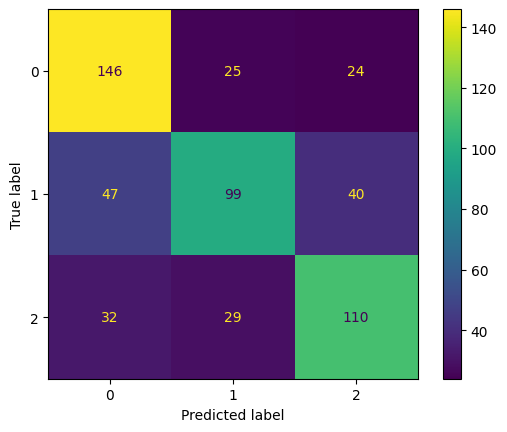

[[146  25  24]
 [ 47  99  40]
 [ 32  29 110]]


In [92]:
cm = confusion_matrix(y_test, pred_pca_best_rf_tuned)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots()
disp.plot(ax=ax)
plt.show()
print(cm)

# Metrics
## Accuracy

In [94]:
print(f"Accuracy: {accuracy_score(y_test, pred_pca_best_rf_tuned)}")

Accuracy: 0.6431159420289855


## Precision

In [95]:
print(f"Precision: {precision_score(y_test, pred_pca_best_rf_tuned,average='weighted')}")

Precision: 0.6430973238870761


## Recall

In [96]:
print(f"Recall: {recall_score(y_test, pred_pca_best_rf_tuned,average='weighted')}")

Recall: 0.6431159420289855


## F1

In [97]:
print(f"F1: {f1_score(y_test, pred_pca_best_rf_tuned,average='weighted')}")

F1: 0.6399494111845851


## Area Under Curve

In [98]:
fpr, tpr, thresholds = roc_curve(y_test, pred_pca_best_rf_tuned, pos_label=2)
print(f"auc: {auc(fpr, tpr)}")

auc: 0.7501496523460884


## ROC Curve

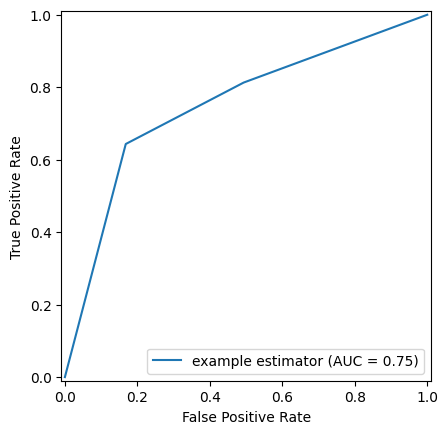

In [99]:
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc(fpr, tpr),estimator_name='example estimator')
display.plot()
plt.show()

## Classification Report

In [100]:
print(classification_report(y_test, pred_pca_best_rf_tuned))

              precision    recall  f1-score   support

           0       0.65      0.75      0.70       195
           1       0.65      0.53      0.58       186
           2       0.63      0.64      0.64       171

    accuracy                           0.64       552
   macro avg       0.64      0.64      0.64       552
weighted avg       0.64      0.64      0.64       552



# Predictions

In [141]:
print(y_test)

[0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 2 2 2 2 1 2 0 2 0 1 1 0 1 2 2 0 0 0 2 0 1
 0 1 2 1 2 2 0 1 1 1 1 2 2 1 0 2 0 0 0 1 0 1 1 0 1 0 1 2 1 2 1 0 2 1 0 0 2
 0 0 2 0 1 1 0 1 2 0 1 1 1 1 2 0 1 0 0 2 1 1 0 1 2 2 2 2 1 2 0 2 0 1 1 0 1
 2 2 1 1 0 2 0 0 0 1 2 2 2 0 2 1 0 2 1 2 1 2 0 2 2 2 0 0 1 1 1 2 1 2 0 2 1
 1 0 1 0 2 2 2 1 2 2 2 1 1 2 0 1 1 0 1 1 1 1 0 1 2 0 1 1 2 0 0 2 2 0 2 1 1
 0 0 2 1 2 1 2 1 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 1 2 1 2 1 2 0 0 2 2 2 0 2
 2 2 2 0 1 1 1 1 0 1 0 0 2 0 1 1 1 2 1 1 2 0 1 0 1 1 2 1 2 2 0 0 1 1 0 1 0
 2 0 0 1 2 0 0 2 0 0 0 0 1 2 0 2 1 2 1 2 0 0 2 2 0 0 2 0 1 2 0 2 0 2 2 0 1
 2 0 1 1 1 0 1 0 0 1 1 0 1 2 2 0 2 2 2 1 2 0 1 0 1 1 1 1 1 2 2 1 0 0 0 2 0
 1 0 1 1 2 2 1 2 0 2 2 1 0 2 2 1 2 2 1 0 2 1 1 1 0 1 2 2 2 0 0 2 1 0 0 1 1
 0 0 1 0 1 0 0 2 0 0 2 0 2 0 2 1 0 1 1 2 1 1 0 2 1 2 2 1 2 1 0 1 0 0 0 0 1
 2 0 2 0 1 1 1 1 1 0 0 2 1 1 2 0 0 2 0 1 0 2 0 0 1 0 2 0 1 1 1 0 1 2 0 2 1
 0 1 0 2 0 2 2 1 0 1 2 1 1 2 0 1 1 0 2 0 2 0 1 2 0 1 0 0 1 0 0 0 0 1 0 2 0
 0 2 2 0 0 0 0 1 1 0 1 1 

Text(0.5, 0, 'Chichen Itza')

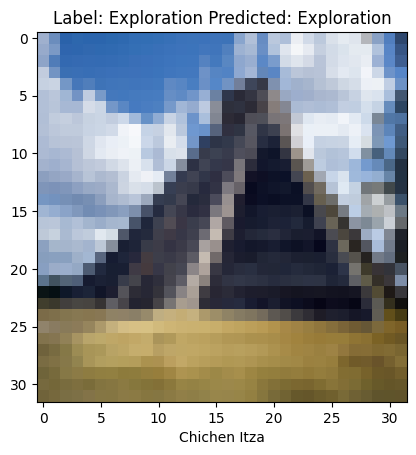

In [159]:
pred = 61
lab = ["Antiquity","Exploration","Modern"]
plt.imshow(np.array(X_test[pred]).reshape(32,32,3))
plt.title(f"Label: {lab[y_test[pred]]} Predicted: {lab[pred_pca_best_rf_tuned[pred]]}")
plt.xlabel(f"Chichen Itza")

Text(0.5, 0, 'Statue of Liberty')

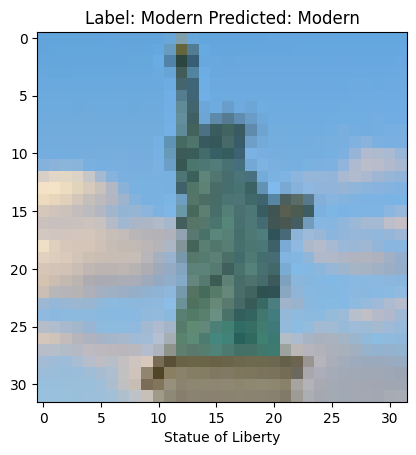

In [160]:
pred = 21
lab = ["Antiquity","Exploration","Modern"]
plt.imshow(np.array(X_test[pred]).reshape(32,32,3))
plt.title(f"Label: {lab[y_test[pred]]} Predicted: {lab[pred_pca_best_rf_tuned[pred]]}")
plt.xlabel(f"Statue of Liberty")

Text(0.5, 0, 'Ruhr Valley')

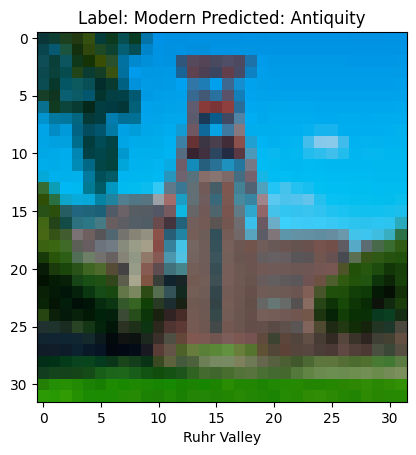

In [193]:
pred = 64
lab = ["Antiquity","Exploration","Modern"]
plt.imshow(np.array(X_test[pred]).reshape(32,32,3))
plt.title(f"Label: {lab[y_test[pred]]} Predicted: {lab[pred_pca_best_rf_tuned[pred]]}")
plt.xlabel(f"Ruhr Valley")

Text(0.5, 0, 'Etemenaki')

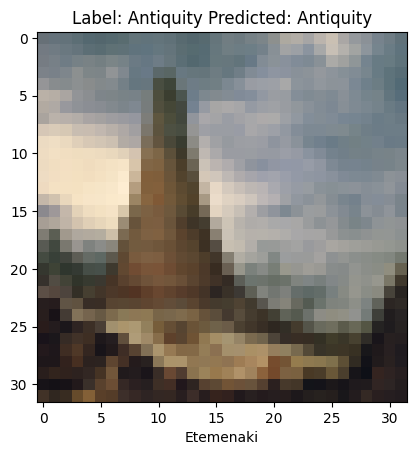

In [194]:
pred = 53
lab = ["Antiquity","Exploration","Modern"]
plt.imshow(np.array(X_test[pred]).reshape(32,32,3))
plt.title(f"Label: {lab[y_test[pred]]} Predicted: {lab[pred_pca_best_rf_tuned[pred]]}")
plt.xlabel(f"Etemenaki")

Text(0.5, 0, 'Eiffel Tower')

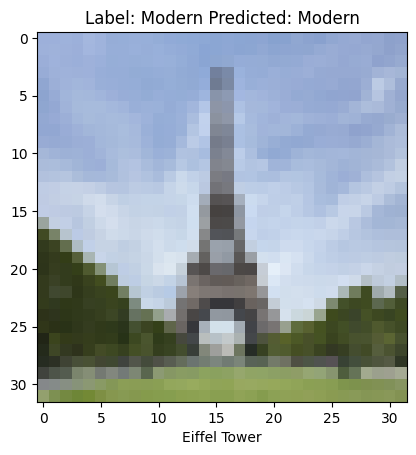

In [195]:
pred = 41
lab = ["Antiquity","Exploration","Modern"]
plt.imshow(np.array(X_test[pred]).reshape(32,32,3))
plt.title(f"Label: {lab[y_test[pred]]} Predicted: {lab[pred_pca_best_rf_tuned[pred]]}")
plt.xlabel(f"Eiffel Tower")

Text(0.5, 0, 'Christ the Redeemer')

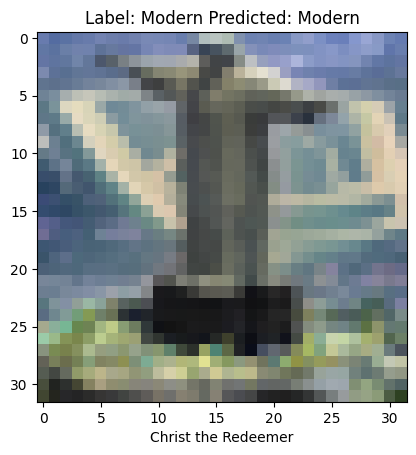

In [196]:
pred = 52
lab = ["Antiquity","Exploration","Modern"]
plt.imshow(np.array(X_test[pred]).reshape(32,32,3))
plt.title(f"Label: {lab[y_test[pred]]} Predicted: {lab[pred_pca_best_rf_tuned[pred]]}")
plt.xlabel(f"Christ the Redeemer")

Text(0.5, 0, 'Chichen Itza')

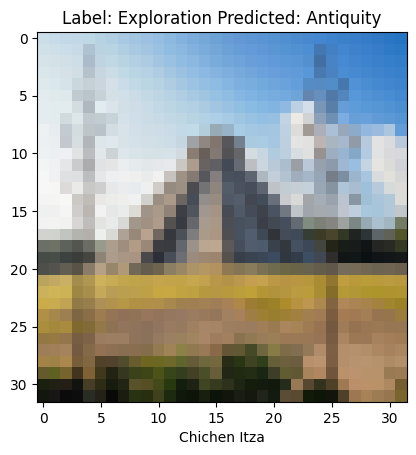

In [197]:
pred = 28
lab = ["Antiquity","Exploration","Modern"]
plt.imshow(np.array(X_test[pred]).reshape(32,32,3))
plt.title(f"Label: {lab[y_test[pred]]} Predicted: {lab[pred_pca_best_rf_tuned[pred]]}")
plt.xlabel(f"Chichen Itza")

Text(0.5, 0, 'Golden Gate')

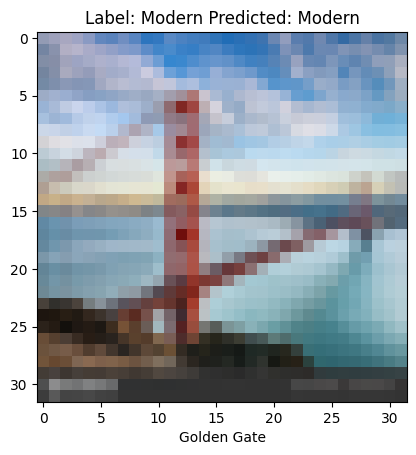

In [204]:
pred = 34
lab = ["Antiquity","Exploration","Modern"]
plt.imshow(np.array(X_test[pred]).reshape(32,32,3))
plt.title(f"Label: {lab[y_test[pred]]} Predicted: {lab[pred_pca_best_rf_tuned[pred]]}")
plt.xlabel(f"Golden Gate")

Text(0.5, 0, 'Golden Gate')

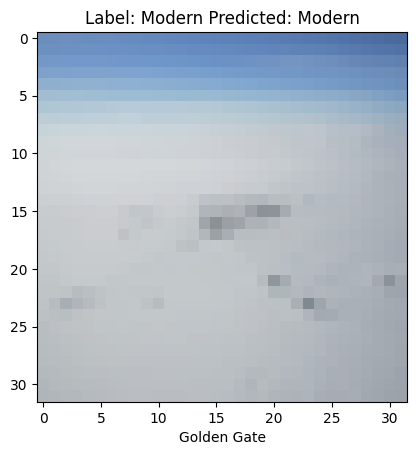

In [218]:
pred = 48
lab = ["Antiquity","Exploration","Modern"]
plt.imshow(np.array(X_test[pred]).reshape(32,32,3))
plt.title(f"Label: {lab[y_test[pred]]} Predicted: {lab[pred_pca_best_rf_tuned[pred]]}")
plt.xlabel(f"Golden Gate")

Text(0.5, 0, 'El Palacio de Bellas Artes')

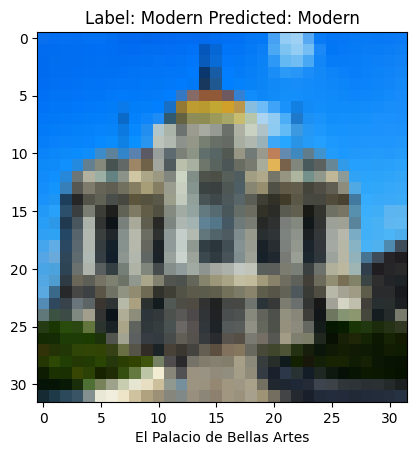

In [254]:
pred = 82
lab = ["Antiquity","Exploration","Modern"]
plt.imshow(np.array(X_test[pred]).reshape(32,32,3))
plt.title(f"Label: {lab[y_test[pred]]} Predicted: {lab[pred_pca_best_rf_tuned[pred]]}")
plt.xlabel(f"El Palacio de Bellas Artes")

# Experiments

In [ ]:
pca = PCA(n_components=256)
X_Surprise = pca.fit_transform(X)
print(X_Surprise.shape)
X_bw_Surprise = pca.fit_transform(X_bw)
print(X_bw_Surprise.shape)

(5519, 256)
(5519, 256)


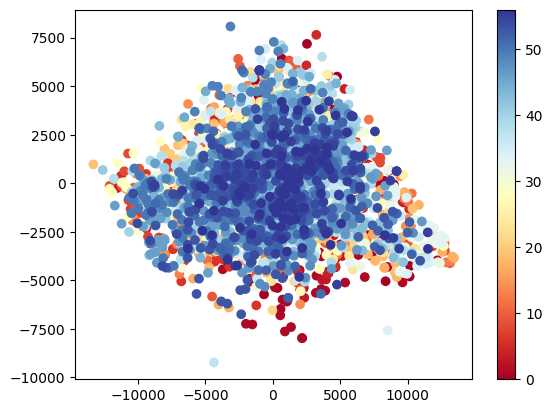

In [8]:
plt.scatter(X_Surprise[:, 0], X_Surprise[:, 1], c=y, cmap='RdYlBu')
plt.colorbar()

In [48]:
X_Surprise_train, X_Surprise_test, y_Surprise_train, y_Surprise_test = train_test_split(X_Surprise, y, test_size=0.2, shuffle=True, random_state=42)
X_bw_Surprise_train, X_bw_Surprise_test, y_bw_Surprise_train, y_bw_Surprise_test = train_test_split(X_bw_Surprise, y, test_size=0.2, shuffle=True, random_state=42)

model_pca = KNeighborsClassifier(n_neighbors=31, n_jobs=-1)
model_pca.fit(X_Surprise_train, y_Surprise_train)
pred_pca = model_pca.predict(X_Surprise_test)
pred_proba_pca = model_pca.predict_proba(X_Surprise_test)
print(accuracy_score(y_Surprise_test, pred_pca))

0.16576086956521738


In [49]:
model_bw_pca = KNeighborsClassifier(n_neighbors=31, n_jobs=-1)
model_bw_pca.fit(X_bw_Surprise_train, y_bw_Surprise_train)
pred_bw_pca = model_bw_pca.predict(X_bw_Surprise_test)
pred_bw_proba_pca = model_bw_pca.predict_proba(X_bw_Surprise_test)
print(accuracy_score(y_bw_Surprise_test, pred_bw_pca))

0.10778985507246377


In [46]:
model_log_pca = LogisticRegression(penalty='l2', n_jobs=-1)
model_log_pca.fit(X_Surprise_train, y_Surprise_train)
pred_log_pca = model_log_pca.predict(X_Surprise_test)
pred_proba_log_pca = model_log_pca.predict_proba(X_Surprise_test)
print(accuracy_score(y_Surprise_test, pred_log_pca))

0.24456521739130435


In [50]:
model_bw_log_pca = LogisticRegression(penalty='l2', n_jobs=-1)
model_bw_log_pca.fit(X_bw_Surprise_train, y_bw_Surprise_train)
pred_bw_log_pca = model_bw_log_pca.predict(X_bw_Surprise_test)
pred_bw_proba_log_pca = model_bw_log_pca.predict_proba(X_bw_Surprise_test)
print(accuracy_score(y_bw_Surprise_test, pred_bw_log_pca))

0.1793478260869565


In [74]:
parameters_pca = {
    'n_components':[2,3,4,8,16,32,64,128,256,512,1024,3072]
}

pipeline_pca = Pipeline(steps=[
    ('pca', PCA()),
    ('logistic', LogisticRegression())
])

parameters_grid = dict(pca__n_components = [2,3,4,8,16,32,64,128,256,512,1024,3072], logistic__penalty=['l2'], logistic__max_iter=[500])

model_pca = PCA()
grid_pca = GridSearchCV(pipeline_pca, parameters_grid, n_jobs=-1, error_score='raise')
grid_pca.fit(X_train, y_train)

GridSearchCV(error_score='raise',
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('logistic', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logistic__max_iter': [500],
                         'logistic__penalty': ['l2'],
                         'pca__n_components': [2, 3, 4, 8, 16, 32, 64, 128, 256,
                                               512, 1024, 3072]})

# TSNE

In [81]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)
print(X_tsne.shape)
X_bw_tsne = tsne.fit_transform(X_bw)
print(X_bw_tsne.shape)

(5519, 2)
(5519, 2)


In [82]:
X_tsne_train, X_tsne_test, y_tsne_train, y_tsne_test = train_test_split(X_tsne, y, test_size=0.2, shuffle=True, random_state=42)

model_tsne = LogisticRegression(penalty='l2', max_iter=500, n_jobs=-1)
model_tsne.fit(X_tsne_train, y_tsne_train)
pred_tsne = model_tsne.predict(X_tsne_test)
pred_proba_tsne = model_tsne.predict_proba(X_tsne_test)
print(accuracy_score(y_tsne_test, pred_tsne))

0.042572463768115944


In [51]:
#TODO: grid search on a pipeline of PCA and ALgorithm (Logistic)

In [ ]:
#TODO: SVC support? vector classifier
#TODO: SGDClassifier
#TODO: TSNE and UMAP